In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [2]:
data_set = pd.read_csv('/home/justice/Desktop/Machine Learning Project/Data set/diabetes.csv')
data_set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


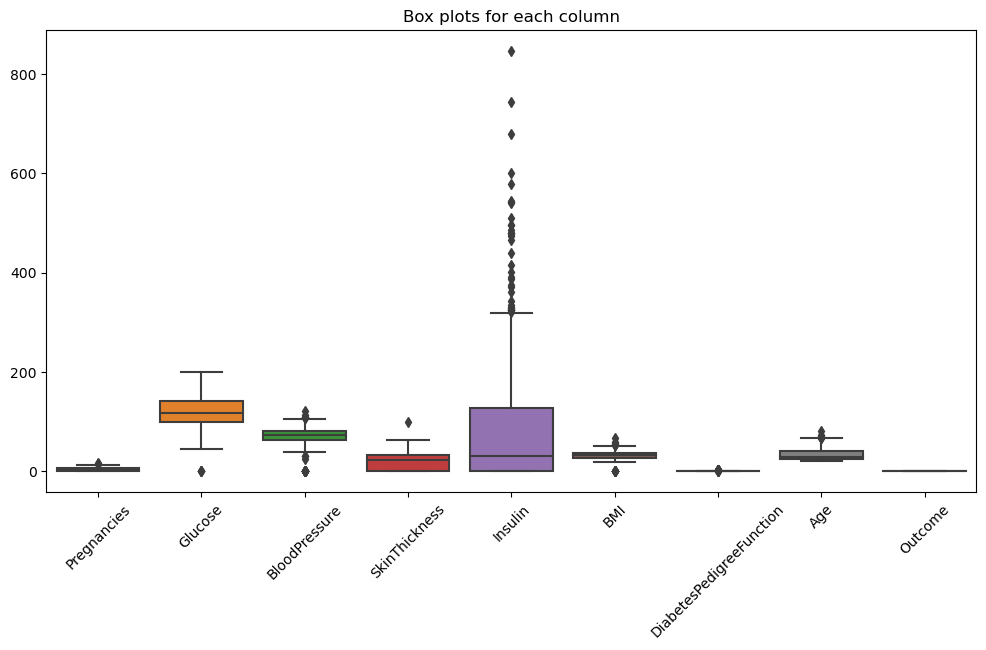

In [3]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_set)
plt.title('Box plots for each column')
plt.xticks(rotation=45)
plt.show()

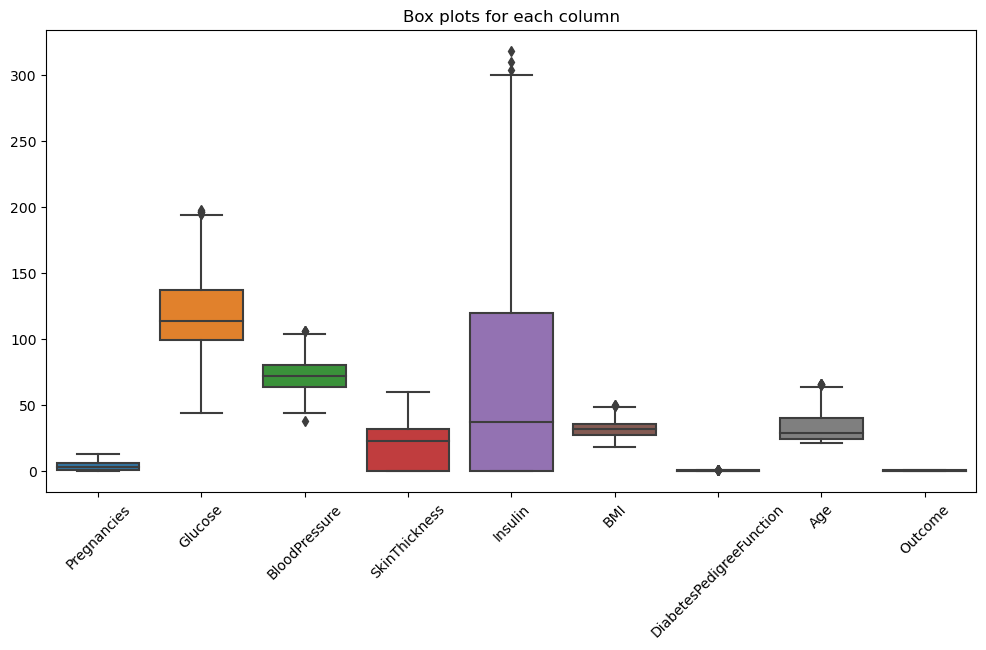

In [5]:
Q1 = data_set.quantile(0.25)
Q3 = data_set.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data_set < (Q1 - 1.5 * IQR)) | (data_set > (Q3 + 1.5 * IQR)))
clean_data_data = data_set[~outliers].dropna()

plt.figure(figsize=(12, 6))
sns.boxplot(data=clean_data_data)
plt.title('Box plots for each column')
plt.xticks(rotation=45)
plt.show()

In [9]:
numerical_columns = clean_data_data.select_dtypes(include=['float64', 'int64']).columns

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected columns using .loc
clean_data_data.loc[:, numerical_columns] = scaler.fit_transform(clean_data_data.loc[:, numerical_columns])
print(clean_data_data)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.461538  0.675325       0.500000       0.583333  0.000000  0.484277   
1       0.076923  0.266234       0.411765       0.483333  0.000000  0.264151   
2       0.615385  0.902597       0.382353       0.000000  0.000000  0.160377   
3       0.076923  0.292208       0.411765       0.383333  0.295597  0.311321   
5       0.384615  0.467532       0.529412       0.000000  0.000000  0.232704   
..           ...       ...            ...            ...       ...       ...   
763     0.769231  0.370130       0.558824       0.800000  0.566038  0.462264   
764     0.153846  0.506494       0.470588       0.450000  0.000000  0.584906   
765     0.384615  0.500000       0.500000       0.383333  0.352201  0.251572   
766     0.076923  0.532468       0.323529       0.000000  0.000000  0.374214   
767     0.076923  0.318182       0.470588       0.516667  0.000000  0.383648   

     DiabetesPedigreeFunction       Age

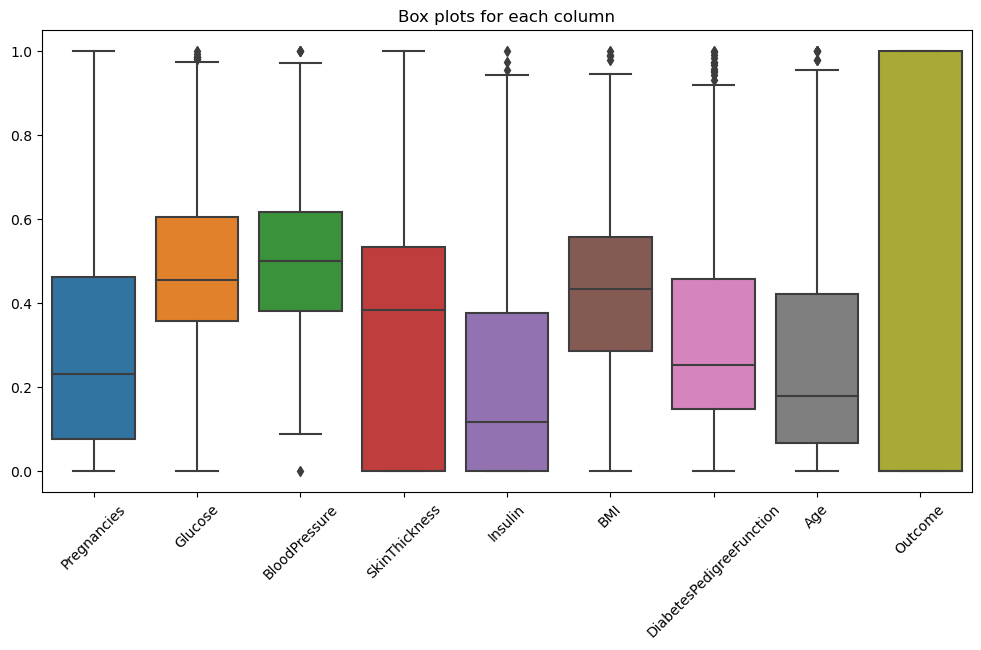

details of Pregnancies 
max = 1.0 and min = 0.0
details of Glucose 
max = 1.0 and min = 0.0
details of BloodPressure 
max = 1.0 and min = 0.0
details of SkinThickness 
max = 1.0 and min = 0.0
details of Insulin 
max = 1.0 and min = 0.0
details of BMI 
max = 1.0 and min = 0.0
details of DiabetesPedigreeFunction 
max = 1.0 and min = 0.0
details of Age 
max = 1.0 and min = 0.0
details of Outcome 
max = 1 and min = 0


In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=clean_data_data)
plt.title('Box plots for each column')
plt.xticks(rotation=45)
plt.show()

for column in clean_data_data.columns:
    max_value = clean_data_data[column].max()
    min_value = clean_data_data[column].min()
    print (f"details of {column} ")
    print(f"max = {max_value} and min = {min_value}")

In [13]:

# Assuming 'target_column' is the column containing your target variable
X = data_set.drop('Outcome', axis=1)
y = data_set['Outcome']

# Split the data into training, validation, and test sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)

# Display the shapes of the resulting datasets
print("Training data shape:", X_train.shape, y_train.shape)
print("Validation data shape:", X_val.shape, y_val.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (460, 8) (460,)
Validation data shape: (154, 8) (154,)
Test data shape: (154, 8) (154,)


In [41]:
alphas =  np.arange(0.01,3,0.01)

selected_features_log = []
log_accuracy_test = 0
log_accuracy_val = 0
log_alpha = 0

selected_features_svm = []
svm_accuracy = 0
svm_accuracy_val = 0
svm_alpha = 0

selected_features_log = []
knn_accuracy = 0
knn_accuracy_val = 0
knn_alpha = 0

for alpha in alphas:
# You can adjust the regularization strength
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    coefficients = lasso_model.coef_
    
#     Print the coefficients for each feature
    print(f" \n  this are the coefficients at {alpha} ")
    for feature, coef in zip(X_train.columns, coefficients):
        print(f"{feature}: {coef}")
    
     # Get the selected features (non-zero coefficients)
    selected_features = np.where(lasso_model.coef_ != 0)[0]
#     print(selected_features)

    # Use the selected features for Logistic Regression
    X_train_selected = X_train.iloc[:, selected_features]
    X_val_selected = X_val.iloc[:, selected_features]

    # Fit Logistic Regression on training set
    logistic_model = LogisticRegression()
    logistic_model.fit(X_train_selected, y_train)
    
    # Make predictions on the training set
    y_train_pred = logistic_model.predict(X_train_selected)

    # Evaluate accuracy on the training set
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Make predictions on the validation set
    y_val_pred = logistic_model.predict(X_val_selected)

    # Evaluate accuracy on the validation set
    val_accuracy = accuracy_score(y_val, y_val_pred)

    
    
    
    #fit the knn on the training set
    knn_model = KNeighborsClassifier(n_neighbors=5) 
    knn_model.fit(X_train_selected, y_train)
        # Make predictions on the training set
    KNN_y_train_pred = knn_model.predict(X_train_selected)

    # Evaluate accuracy on the training set
    KNN_train_accuracy = accuracy_score(y_train, KNN_y_train_pred)

    # Make predictions on the validation set
    KNN_y_val_pred = knn_model.predict(X_val_selected)

    # Evaluate accuracy on the validation set
    KNN_val_accuracy = accuracy_score(y_val, KNN_y_val_pred)
    
    
    # Fit SVM on training set
    svm_model = SVC()
    svm_model.fit(X_train_selected, y_train)

    # Make predictions on the training set
    svm_y_train_pred = svm_model.predict(X_train_selected)

    # Evaluate accuracy on the training set
    svm_train_accuracy = accuracy_score(y_train, svm_y_train_pred)

    # Make predictions on the validation set
    svm_y_val_pred = svm_model.predict(X_val_selected)

    # Evaluate accuracy on the validation set
    svm_val_accuracy = accuracy_score(y_val, svm_y_val_pred)
    
#    log reg use this code to get the best model or validation error for at alpha
    if val_accuracy >  log_accuracy_val:
        log_accuracy_val = val_accuracy
        log_alpha = alpha
        log_accuracy_test = train_accuracy
   
#  same for  svm  
    if svm_val_accuracy >  svm_accuracy_val :
        svm_accuracy_val = svm_val_accuracy
        svm_alpha = alpha
        svm_accuracy = train_accuracy
        
#         same for knn
    if KNN_val_accuracy >   knn_accuracy_val:
        knn_accuracy_val = KNN_val_accuracy
        knn_alpha = alpha
        knn_accuracy = KNN_train_accuracy
        
        
    print(f"Accuracy with alpha={alpha}: Training Accuracy={train_accuracy}, Validation Accuracy={val_accuracy}")
    print(f"Accuracy with alpha={alpha}: Training Accuracy={KNN_train_accuracy}, Validation Accuracy={KNN_val_accuracy}")    
    print(f"Accuracy with alpha={alpha}: Training Accuracy={svm_train_accuracy}, Validation Accuracy={svm_val_accuracy}")
        

print("\n this session of the code is used to show the selected features ")        
        
lasso_model = Lasso(alpha=log_alpha)
lasso_model.fit(X_train, y_train)
coefficients = lasso_model.coef_  
print(f" \n  this are the coefficients at {log_alpha} ")
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef}")
selected_features = np.where(lasso_model.coef_ != 0)[0]
print(selected_features)
print(f"Accuracy with alpha={log_alpha}: Training Accuracy={log_accuracy_test}, Validation Accuracy={log_accuracy_val}")
  

    
lasso_model = Lasso(alpha=svm_alpha)
lasso_model.fit(X_train, y_train)
coefficients = lasso_model.coef_  
print(f" \n  this are the coefficients at {svm_alpha} ")
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef}")
selected_features = np.where(lasso_model.coef_ != 0)[0]
print(selected_features)
print(f"Accuracy with alpha={svm_alpha}: Training Accuracy={svm_accuracy}, Validation Accuracy={svm_accuracy_val}")    
  
    
    
lasso_model = Lasso(alpha=knn_alpha)
lasso_model.fit(X_train, y_train)
coefficients = lasso_model.coef_  
print(f" \n  this are the coefficients at {knn_alpha} ")
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef}")
selected_features = np.where(lasso_model.coef_ != 0)[0]
print(selected_features)
print(f"Accuracy with alpha={knn_alpha}: Training Accuracy={knn_accuracy}, Validation Accuracy={knn_accuracy_val}")    
        


 
  this are the coefficients at 0.01 
Pregnancies: 0.008375787047437003
Glucose: 0.004892821043261496
BloodPressure: -0.0033648580522447585
SkinThickness: 0.0016428229252948524
Insulin: -0.00020540423261472814
BMI: 0.015375203075385813
DiabetesPedigreeFunction: 0.0
Age: 0.008812359801467147
Accuracy with alpha=0.01: Training Accuracy=0.758695652173913, Validation Accuracy=0.7792207792207793
Accuracy with alpha=0.01: Training Accuracy=0.782608695652174, Validation Accuracy=0.7337662337662337
Accuracy with alpha=0.01: Training Accuracy=0.7630434782608696, Validation Accuracy=0.7727272727272727
 
  this are the coefficients at 0.02 
Pregnancies: 0.007339830640194072
Glucose: 0.004894005079639555
BloodPressure: -0.0032907143500966163
SkinThickness: 0.0016017400962552455
Insulin: -0.0002029007385098838
BMI: 0.015195048505873204
DiabetesPedigreeFunction: 0.0
Age: 0.0088780986051494
Accuracy with alpha=0.02: Training Accuracy=0.758695652173913, Validation Accuracy=0.7792207792207793
Accuracy

Accuracy with alpha=0.16: Training Accuracy=0.7652173913043478, Validation Accuracy=0.7792207792207793
Accuracy with alpha=0.16: Training Accuracy=0.782608695652174, Validation Accuracy=0.7272727272727273
Accuracy with alpha=0.16: Training Accuracy=0.7695652173913043, Validation Accuracy=0.7662337662337663
 
  this are the coefficients at 0.17 
Pregnancies: 0.0
Glucose: 0.004886274330811604
BloodPressure: -0.002156171674908938
SkinThickness: 0.0009059532529409023
Insulin: -0.0001443625496204043
BMI: 0.012289280513626114
DiabetesPedigreeFunction: 0.0
Age: 0.0085165662620284
Accuracy with alpha=0.17: Training Accuracy=0.7652173913043478, Validation Accuracy=0.7792207792207793
Accuracy with alpha=0.17: Training Accuracy=0.782608695652174, Validation Accuracy=0.7272727272727273
Accuracy with alpha=0.17: Training Accuracy=0.7695652173913043, Validation Accuracy=0.7662337662337663
 
  this are the coefficients at 0.18000000000000002 
Pregnancies: 0.0
Glucose: 0.004884321670762248
BloodPressu

Accuracy with alpha=0.3: Training Accuracy=0.7652173913043478, Validation Accuracy=0.7792207792207793
Accuracy with alpha=0.3: Training Accuracy=0.782608695652174, Validation Accuracy=0.7272727272727273
Accuracy with alpha=0.3: Training Accuracy=0.7695652173913043, Validation Accuracy=0.7662337662337663
 
  this are the coefficients at 0.31 
Pregnancies: 0.0
Glucose: 0.004858590509383845
BloodPressure: -0.0010786377405193057
SkinThickness: 0.0001919239441454022
Insulin: -7.233979758301969e-05
BMI: 0.009405790180532411
DiabetesPedigreeFunction: 0.0
Age: 0.007052897568923002
Accuracy with alpha=0.31: Training Accuracy=0.7652173913043478, Validation Accuracy=0.7792207792207793
Accuracy with alpha=0.31: Training Accuracy=0.782608695652174, Validation Accuracy=0.7272727272727273
Accuracy with alpha=0.31: Training Accuracy=0.7695652173913043, Validation Accuracy=0.7662337662337663
 
  this are the coefficients at 0.32 
Pregnancies: 0.0
Glucose: 0.004856600346945721
BloodPressure: -0.00100166

Accuracy with alpha=0.46: Training Accuracy=0.7652173913043478, Validation Accuracy=0.8051948051948052
Accuracy with alpha=0.46: Training Accuracy=0.7978260869565217, Validation Accuracy=0.7077922077922078
Accuracy with alpha=0.46: Training Accuracy=0.7695652173913043, Validation Accuracy=0.7662337662337663
 
  this are the coefficients at 0.47000000000000003 
Pregnancies: 0.0
Glucose: 0.004884217766901043
BloodPressure: -0.0
SkinThickness: 0.0
Insulin: -2.3769687408483606e-05
BMI: 0.0058097683756522965
DiabetesPedigreeFunction: 0.0
Age: 0.0055047972640080494
Accuracy with alpha=0.47000000000000003: Training Accuracy=0.7652173913043478, Validation Accuracy=0.8051948051948052
Accuracy with alpha=0.47000000000000003: Training Accuracy=0.7978260869565217, Validation Accuracy=0.7077922077922078
Accuracy with alpha=0.47000000000000003: Training Accuracy=0.7695652173913043, Validation Accuracy=0.7662337662337663
 
  this are the coefficients at 0.48000000000000004 
Pregnancies: 0.0
Glucose: 

Accuracy with alpha=0.62: Training Accuracy=0.7630434782608696, Validation Accuracy=0.7987012987012987
Accuracy with alpha=0.62: Training Accuracy=0.808695652173913, Validation Accuracy=0.7077922077922078
Accuracy with alpha=0.62: Training Accuracy=0.75, Validation Accuracy=0.7792207792207793
 
  this are the coefficients at 0.63 
Pregnancies: 0.0
Glucose: 0.0049559293165808505
BloodPressure: -0.0
SkinThickness: 0.0
Insulin: -0.0
BMI: 0.002904782162321652
DiabetesPedigreeFunction: 0.0
Age: 0.004335201759317278
Accuracy with alpha=0.63: Training Accuracy=0.7630434782608696, Validation Accuracy=0.7987012987012987
Accuracy with alpha=0.63: Training Accuracy=0.808695652173913, Validation Accuracy=0.7077922077922078
Accuracy with alpha=0.63: Training Accuracy=0.75, Validation Accuracy=0.7792207792207793
 
  this are the coefficients at 0.64 
Pregnancies: 0.0
Glucose: 0.004962365543400963
BloodPressure: -0.0
SkinThickness: 0.0
Insulin: -0.0
BMI: 0.0027265319511939543
DiabetesPedigreeFunction

Accuracy with alpha=0.78: Training Accuracy=0.7630434782608696, Validation Accuracy=0.7987012987012987
Accuracy with alpha=0.78: Training Accuracy=0.808695652173913, Validation Accuracy=0.7077922077922078
Accuracy with alpha=0.78: Training Accuracy=0.75, Validation Accuracy=0.7792207792207793
 
  this are the coefficients at 0.79 
Pregnancies: 0.0
Glucose: 0.005058930786091293
BloodPressure: -0.0
SkinThickness: 0.0
Insulin: -0.0
BMI: 5.277770707388924e-05
DiabetesPedigreeFunction: 0.0
Age: 0.003131370084033201
Accuracy with alpha=0.79: Training Accuracy=0.7630434782608696, Validation Accuracy=0.7987012987012987
Accuracy with alpha=0.79: Training Accuracy=0.808695652173913, Validation Accuracy=0.7077922077922078
Accuracy with alpha=0.79: Training Accuracy=0.75, Validation Accuracy=0.7792207792207793
 
  this are the coefficients at 0.8 
Pregnancies: 0.0
Glucose: 0.005059867747078388
BloodPressure: -0.0
SkinThickness: 0.0
Insulin: -0.0
BMI: 0.0
DiabetesPedigreeFunction: 0.0
Age: 0.003056

Accuracy with alpha=0.9500000000000001: Training Accuracy=0.7456521739130435, Validation Accuracy=0.7532467532467533
Accuracy with alpha=0.9500000000000001: Training Accuracy=0.8217391304347826, Validation Accuracy=0.6948051948051948
Accuracy with alpha=0.9500000000000001: Training Accuracy=0.7478260869565218, Validation Accuracy=0.7597402597402597
 
  this are the coefficients at 0.9600000000000001 
Pregnancies: 0.0
Glucose: 0.005037889892948462
BloodPressure: -0.0
SkinThickness: 0.0
Insulin: -0.0
BMI: 0.0
DiabetesPedigreeFunction: 0.0
Age: 0.0018565835761637645
Accuracy with alpha=0.9600000000000001: Training Accuracy=0.7456521739130435, Validation Accuracy=0.7532467532467533
Accuracy with alpha=0.9600000000000001: Training Accuracy=0.8217391304347826, Validation Accuracy=0.6948051948051948
Accuracy with alpha=0.9600000000000001: Training Accuracy=0.7478260869565218, Validation Accuracy=0.7597402597402597
 
  this are the coefficients at 0.97 
Pregnancies: 0.0
Glucose: 0.005036516277

Accuracy with alpha=1.1300000000000001: Training Accuracy=0.7456521739130435, Validation Accuracy=0.7532467532467533
Accuracy with alpha=1.1300000000000001: Training Accuracy=0.8217391304347826, Validation Accuracy=0.6948051948051948
Accuracy with alpha=1.1300000000000001: Training Accuracy=0.7478260869565218, Validation Accuracy=0.7597402597402597
 
  this are the coefficients at 1.1400000000000001 
Pregnancies: 0.0
Glucose: 0.005013198968247581
BloodPressure: 0.0
SkinThickness: 0.0
Insulin: -0.0
BMI: 0.0
DiabetesPedigreeFunction: 0.0
Age: 0.0005068584848498472
Accuracy with alpha=1.1400000000000001: Training Accuracy=0.7456521739130435, Validation Accuracy=0.7532467532467533
Accuracy with alpha=1.1400000000000001: Training Accuracy=0.8217391304347826, Validation Accuracy=0.6948051948051948
Accuracy with alpha=1.1400000000000001: Training Accuracy=0.7478260869565218, Validation Accuracy=0.7597402597402597
 
  this are the coefficients at 1.1500000000000001 
Pregnancies: 0.0
Glucose: 0

Accuracy with alpha=1.3: Training Accuracy=0.7369565217391304, Validation Accuracy=0.7727272727272727
Accuracy with alpha=1.3: Training Accuracy=0.7804347826086957, Validation Accuracy=0.7597402597402597
Accuracy with alpha=1.3: Training Accuracy=0.7304347826086957, Validation Accuracy=0.7662337662337663
 
  this are the coefficients at 1.31 
Pregnancies: 0.0
Glucose: 0.004910292626210836
BloodPressure: 0.0
SkinThickness: 0.0
Insulin: 0.0
BMI: 0.0
DiabetesPedigreeFunction: 0.0
Age: 0.0
Accuracy with alpha=1.31: Training Accuracy=0.7369565217391304, Validation Accuracy=0.7727272727272727
Accuracy with alpha=1.31: Training Accuracy=0.7804347826086957, Validation Accuracy=0.7597402597402597
Accuracy with alpha=1.31: Training Accuracy=0.7304347826086957, Validation Accuracy=0.7662337662337663
 
  this are the coefficients at 1.32 
Pregnancies: 0.0
Glucose: 0.00490115329274873
BloodPressure: 0.0
SkinThickness: 0.0
Insulin: 0.0
BMI: 0.0
DiabetesPedigreeFunction: 0.0
Age: 0.0
Accuracy with al

Accuracy with alpha=1.48: Training Accuracy=0.7369565217391304, Validation Accuracy=0.7727272727272727
Accuracy with alpha=1.48: Training Accuracy=0.7804347826086957, Validation Accuracy=0.7597402597402597
Accuracy with alpha=1.48: Training Accuracy=0.7304347826086957, Validation Accuracy=0.7662337662337663
 
  this are the coefficients at 1.49 
Pregnancies: 0.0
Glucose: 0.0047457846238929515
BloodPressure: 0.0
SkinThickness: 0.0
Insulin: 0.0
BMI: 0.0
DiabetesPedigreeFunction: 0.0
Age: 0.0
Accuracy with alpha=1.49: Training Accuracy=0.7369565217391304, Validation Accuracy=0.7727272727272727
Accuracy with alpha=1.49: Training Accuracy=0.7804347826086957, Validation Accuracy=0.7597402597402597
Accuracy with alpha=1.49: Training Accuracy=0.7304347826086957, Validation Accuracy=0.7662337662337663
 
  this are the coefficients at 1.5 
Pregnancies: 0.0
Glucose: 0.004736645290430847
BloodPressure: 0.0
SkinThickness: 0.0
Insulin: 0.0
BMI: 0.0
DiabetesPedigreeFunction: 0.0
Age: 0.0
Accuracy wit

Accuracy with alpha=1.6600000000000001: Training Accuracy=0.7369565217391304, Validation Accuracy=0.7727272727272727
Accuracy with alpha=1.6600000000000001: Training Accuracy=0.7804347826086957, Validation Accuracy=0.7597402597402597
Accuracy with alpha=1.6600000000000001: Training Accuracy=0.7304347826086957, Validation Accuracy=0.7662337662337663
 
  this are the coefficients at 1.6700000000000002 
Pregnancies: 0.0
Glucose: 0.004581276621575068
BloodPressure: 0.0
SkinThickness: 0.0
Insulin: 0.0
BMI: 0.0
DiabetesPedigreeFunction: 0.0
Age: 0.0
Accuracy with alpha=1.6700000000000002: Training Accuracy=0.7369565217391304, Validation Accuracy=0.7727272727272727
Accuracy with alpha=1.6700000000000002: Training Accuracy=0.7804347826086957, Validation Accuracy=0.7597402597402597
Accuracy with alpha=1.6700000000000002: Training Accuracy=0.7304347826086957, Validation Accuracy=0.7662337662337663
 
  this are the coefficients at 1.68 
Pregnancies: 0.0
Glucose: 0.0045721372881129645
BloodPressur

Accuracy with alpha=1.84: Training Accuracy=0.7369565217391304, Validation Accuracy=0.7727272727272727
Accuracy with alpha=1.84: Training Accuracy=0.7804347826086957, Validation Accuracy=0.7597402597402597
Accuracy with alpha=1.84: Training Accuracy=0.7304347826086957, Validation Accuracy=0.7662337662337663
 
  this are the coefficients at 1.85 
Pregnancies: 0.0
Glucose: 0.004416768619257184
BloodPressure: 0.0
SkinThickness: 0.0
Insulin: 0.0
BMI: 0.0
DiabetesPedigreeFunction: 0.0
Age: 0.0
Accuracy with alpha=1.85: Training Accuracy=0.7369565217391304, Validation Accuracy=0.7727272727272727
Accuracy with alpha=1.85: Training Accuracy=0.7804347826086957, Validation Accuracy=0.7597402597402597
Accuracy with alpha=1.85: Training Accuracy=0.7304347826086957, Validation Accuracy=0.7662337662337663
 
  this are the coefficients at 1.86 
Pregnancies: 0.0
Glucose: 0.00440762928579508
BloodPressure: 0.0
SkinThickness: 0.0
Insulin: 0.0
BMI: 0.0
DiabetesPedigreeFunction: 0.0
Age: 0.0
Accuracy with

Accuracy with alpha=2.02: Training Accuracy=0.7369565217391304, Validation Accuracy=0.7727272727272727
Accuracy with alpha=2.02: Training Accuracy=0.7804347826086957, Validation Accuracy=0.7597402597402597
Accuracy with alpha=2.02: Training Accuracy=0.7304347826086957, Validation Accuracy=0.7662337662337663
 
  this are the coefficients at 2.03 
Pregnancies: 0.0
Glucose: 0.004252260616939302
BloodPressure: 0.0
SkinThickness: 0.0
Insulin: 0.0
BMI: 0.0
DiabetesPedigreeFunction: 0.0
Age: 0.0
Accuracy with alpha=2.03: Training Accuracy=0.7369565217391304, Validation Accuracy=0.7727272727272727
Accuracy with alpha=2.03: Training Accuracy=0.7804347826086957, Validation Accuracy=0.7597402597402597
Accuracy with alpha=2.03: Training Accuracy=0.7304347826086957, Validation Accuracy=0.7662337662337663
 
  this are the coefficients at 2.04 
Pregnancies: 0.0
Glucose: 0.0042431212834771964
BloodPressure: 0.0
SkinThickness: 0.0
Insulin: 0.0
BMI: 0.0
DiabetesPedigreeFunction: 0.0
Age: 0.0
Accuracy wi

Accuracy with alpha=2.1999999999999997: Training Accuracy=0.7369565217391304, Validation Accuracy=0.7727272727272727
Accuracy with alpha=2.1999999999999997: Training Accuracy=0.7804347826086957, Validation Accuracy=0.7597402597402597
Accuracy with alpha=2.1999999999999997: Training Accuracy=0.7304347826086957, Validation Accuracy=0.7662337662337663
 
  this are the coefficients at 2.21 
Pregnancies: 0.0
Glucose: 0.004087752614621418
BloodPressure: 0.0
SkinThickness: 0.0
Insulin: 0.0
BMI: 0.0
DiabetesPedigreeFunction: 0.0
Age: 0.0
Accuracy with alpha=2.21: Training Accuracy=0.7369565217391304, Validation Accuracy=0.7727272727272727
Accuracy with alpha=2.21: Training Accuracy=0.7804347826086957, Validation Accuracy=0.7597402597402597
Accuracy with alpha=2.21: Training Accuracy=0.7304347826086957, Validation Accuracy=0.7662337662337663
 
  this are the coefficients at 2.2199999999999998 
Pregnancies: 0.0
Glucose: 0.004078613281159314
BloodPressure: 0.0
SkinThickness: 0.0
Insulin: 0.0
BMI:

Accuracy with alpha=2.38: Training Accuracy=0.7369565217391304, Validation Accuracy=0.7727272727272727
Accuracy with alpha=2.38: Training Accuracy=0.7804347826086957, Validation Accuracy=0.7597402597402597
Accuracy with alpha=2.38: Training Accuracy=0.7304347826086957, Validation Accuracy=0.7662337662337663
 
  this are the coefficients at 2.3899999999999997 
Pregnancies: 0.0
Glucose: 0.0039232446123035345
BloodPressure: 0.0
SkinThickness: 0.0
Insulin: 0.0
BMI: 0.0
DiabetesPedigreeFunction: 0.0
Age: 0.0
Accuracy with alpha=2.3899999999999997: Training Accuracy=0.7369565217391304, Validation Accuracy=0.7727272727272727
Accuracy with alpha=2.3899999999999997: Training Accuracy=0.7804347826086957, Validation Accuracy=0.7597402597402597
Accuracy with alpha=2.3899999999999997: Training Accuracy=0.7304347826086957, Validation Accuracy=0.7662337662337663
 
  this are the coefficients at 2.4 
Pregnancies: 0.0
Glucose: 0.003914105278841429
BloodPressure: 0.0
SkinThickness: 0.0
Insulin: 0.0
BMI:

Accuracy with alpha=2.55: Training Accuracy=0.7369565217391304, Validation Accuracy=0.7727272727272727
Accuracy with alpha=2.55: Training Accuracy=0.7804347826086957, Validation Accuracy=0.7597402597402597
Accuracy with alpha=2.55: Training Accuracy=0.7304347826086957, Validation Accuracy=0.7662337662337663
 
  this are the coefficients at 2.56 
Pregnancies: 0.0
Glucose: 0.0037678759434477548
BloodPressure: 0.0
SkinThickness: 0.0
Insulin: 0.0
BMI: 0.0
DiabetesPedigreeFunction: 0.0
Age: 0.0
Accuracy with alpha=2.56: Training Accuracy=0.7369565217391304, Validation Accuracy=0.7727272727272727
Accuracy with alpha=2.56: Training Accuracy=0.7804347826086957, Validation Accuracy=0.7597402597402597
Accuracy with alpha=2.56: Training Accuracy=0.7304347826086957, Validation Accuracy=0.7662337662337663
 
  this are the coefficients at 2.57 
Pregnancies: 0.0
Glucose: 0.003758736609985651
BloodPressure: 0.0
SkinThickness: 0.0
Insulin: 0.0
BMI: 0.0
DiabetesPedigreeFunction: 0.0
Age: 0.0
Accuracy wi

Accuracy with alpha=2.73: Training Accuracy=0.7369565217391304, Validation Accuracy=0.7727272727272727
Accuracy with alpha=2.73: Training Accuracy=0.7804347826086957, Validation Accuracy=0.7597402597402597
Accuracy with alpha=2.73: Training Accuracy=0.7304347826086957, Validation Accuracy=0.7662337662337663
 
  this are the coefficients at 2.7399999999999998 
Pregnancies: 0.0
Glucose: 0.003603367941129872
BloodPressure: 0.0
SkinThickness: 0.0
Insulin: 0.0
BMI: 0.0
DiabetesPedigreeFunction: 0.0
Age: 0.0
Accuracy with alpha=2.7399999999999998: Training Accuracy=0.7369565217391304, Validation Accuracy=0.7727272727272727
Accuracy with alpha=2.7399999999999998: Training Accuracy=0.7804347826086957, Validation Accuracy=0.7597402597402597
Accuracy with alpha=2.7399999999999998: Training Accuracy=0.7304347826086957, Validation Accuracy=0.7662337662337663
 
  this are the coefficients at 2.75 
Pregnancies: 0.0
Glucose: 0.003594228607667767
BloodPressure: 0.0
SkinThickness: 0.0
Insulin: 0.0
BMI:

Accuracy with alpha=2.9099999999999997: Training Accuracy=0.7369565217391304, Validation Accuracy=0.7727272727272727
Accuracy with alpha=2.9099999999999997: Training Accuracy=0.7804347826086957, Validation Accuracy=0.7597402597402597
Accuracy with alpha=2.9099999999999997: Training Accuracy=0.7304347826086957, Validation Accuracy=0.7662337662337663
 
  this are the coefficients at 2.92 
Pregnancies: 0.0
Glucose: 0.003438859938811988
BloodPressure: 0.0
SkinThickness: 0.0
Insulin: 0.0
BMI: 0.0
DiabetesPedigreeFunction: 0.0
Age: 0.0
Accuracy with alpha=2.92: Training Accuracy=0.7369565217391304, Validation Accuracy=0.7727272727272727
Accuracy with alpha=2.92: Training Accuracy=0.7804347826086957, Validation Accuracy=0.7597402597402597
Accuracy with alpha=2.92: Training Accuracy=0.7304347826086957, Validation Accuracy=0.7662337662337663
 
  this are the coefficients at 2.9299999999999997 
Pregnancies: 0.0
Glucose: 0.0034297206053498833
BloodPressure: 0.0
SkinThickness: 0.0
Insulin: 0.0
BMI